In [1]:
import jupyter_black

jupyter_black.load()

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from svm import SVMPrimal

In [3]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=42,
    n_clusters_per_class=1,
)

# Convert labels to {-1, 1}
y = 2 * y - 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVMPrimal(C=1.0)
svm.fit(X_train, y_train)

train_preds = svm.predict(X_train)
test_preds = svm.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Testing accuracy: {test_accuracy:.4f}")

Training accuracy: 1.0000
Testing accuracy: 1.0000


In [4]:
def plot_decision_boundary(X, y, model, figsize=(8, 5), h: float = 0.02):
    fig, ax = plt.subplots(figsize=figsize)
    # Create a mesh grid on which we will run our model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # plot decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # plot the data
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")

    # plot the separating hyperplane
    w = model.w
    b = model.b
    slope = -w[0] / w[1]
    intercept = -b / w[1]

    margin = 1 / np.sqrt(np.sum(w**2))
    margin_upper = intercept + margin
    margin_lower = intercept - margin

    # Plot hyperplane and margins
    x_range = np.linspace(x_min, x_max)
    plt.plot(x_range, x_range * slope + intercept, "k-", label="Decision Boundary")
    plt.plot(x_range, x_range * slope + margin_upper, "k--", label="Margin")
    plt.plot(x_range, x_range * slope + margin_lower, "k--")

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.legend()
    plt.show()

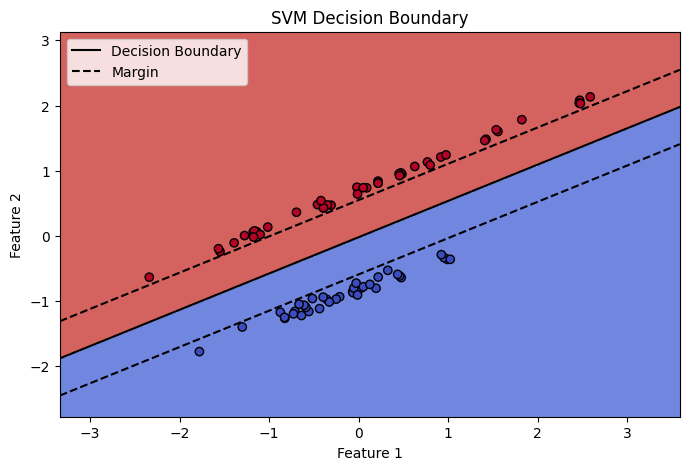

In [5]:
plot_decision_boundary(X_train, y_train, svm)